In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Clone YOLOv5 Repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 28 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.68 MiB | 14.80 MiB/s, done.
Resolving deltas: 100% (11719/11719), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 23.5 MB/s eta 0:00:00


In [5]:
# Copy dataset from Google Drive to Colab
!cp -r /content/drive/MyDrive/signlanguage/sign_language.v1i.yolov5pytorch /content/yolov5/dataset

In [9]:
# Verify the dataset structure
!ls dataset


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [10]:
# Check the contents of data.yaml
!cat dataset/data.yaml


train: dataset/train/images
val: dataset/valid/images
test: dataset/test/images

nc: 5
names: ['hello', 'love you', 'no', 'thank you', 'yes']

In [13]:
# Train YOLOv5 on your dataset
!python train.py --img 640 --batch 16 --epochs 50 --data dataset/data.yaml --weights yolov5s.pt


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-01 06:07:16.239980: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-01 06:07:16.269463: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-01 06:07:16.275693: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visua

In [16]:
# search for the best.pt file for testing in exp
!ls runs/train/exp/weights


In [17]:
#not found best.pt in exp search it in exp2
!find runs/train/ -name "best.pt"


runs/train/exp2/weights/best.pt


In [18]:
!python detect.py --weights runs/train/exp2/weights/best.pt --source dataset/test/images --img 640 --conf-thres 0.25 --iou-thres 0.45 --save-txt --save-conf --project runs/detect --name exp2 --exist-ok


detect: weights=['runs/train/exp2/weights/best.pt'], source=dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp2, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /content/yolov5/dataset/test/images/LoveYou_1_jpg.rf.2650f3f52f7bb1a9019d2c1678d09e8a.jpg: 640x640 1 hello, 11.4ms
image 2/5 /content/yolov5/dataset/test/images/LoveYou_4_jpg.rf.c904ef7d7108b4d58c9de5027bcec552.jpg: 640x640 1 hello, 11.5ms
image 3/5 /content/yolov5/dataset/test/images/LoveYou_5_jpg.rf.d6

In [20]:
#saving the model to deploy for real time
!cp runs/train/exp2/weights/best.pt /content/drive/MyDrive/signlanguage/best.pt


VISUALIZATION OF TRAINING

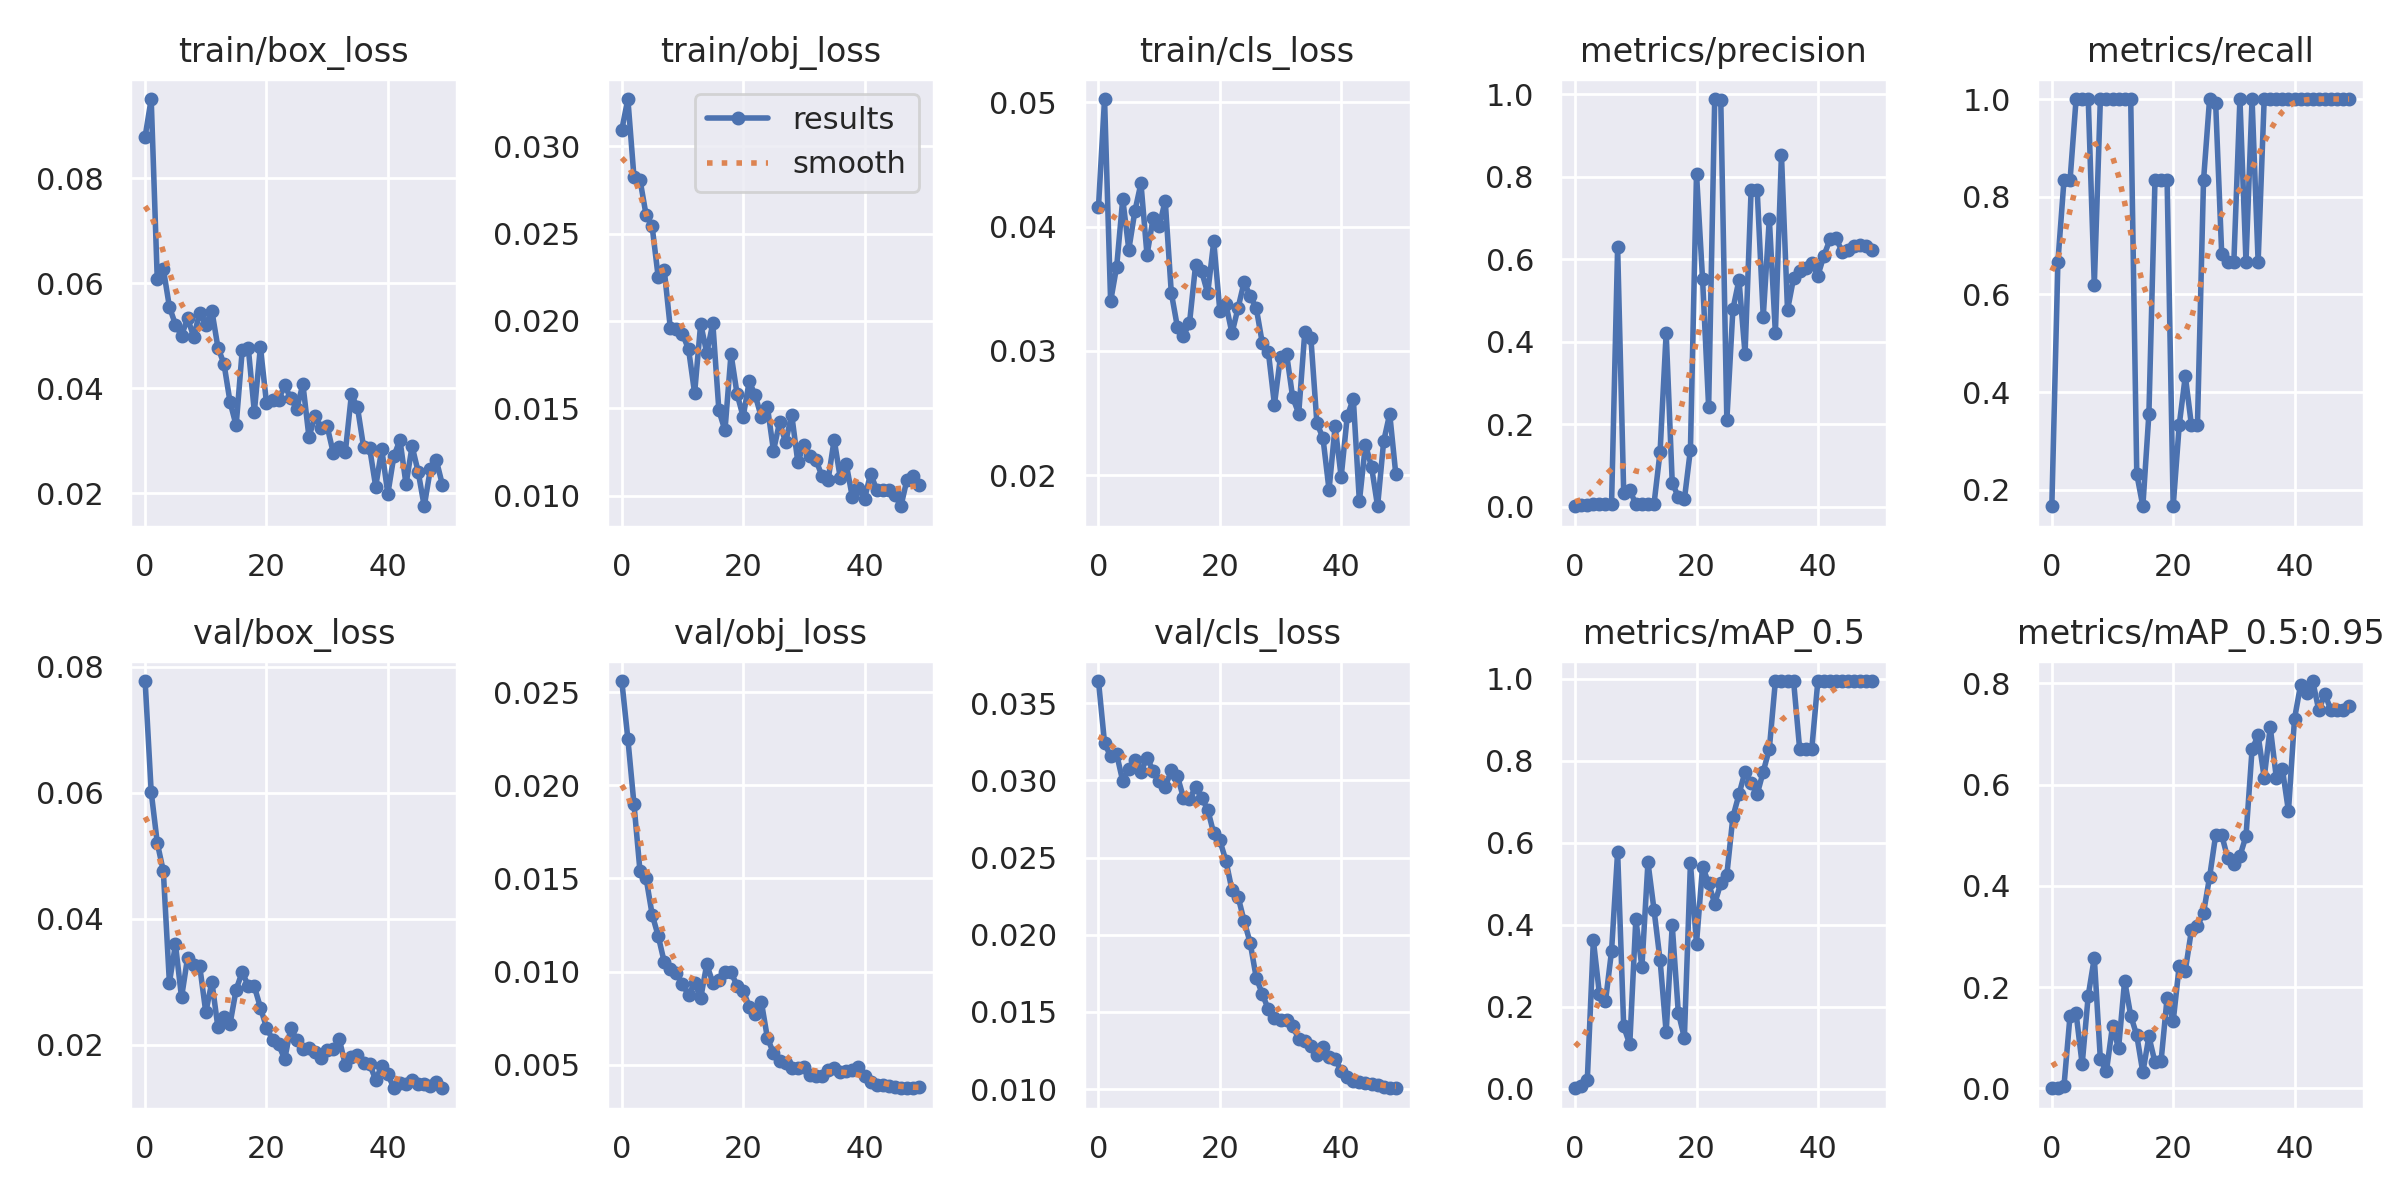

In [21]:
from IPython.display import Image

# Replace 'exp2' with your experiment name
Image(filename='runs/train/exp2/results.png', width=800)


In [30]:
from google.colab import files
uploaded = files.upload()

# List the uploaded files
uploaded_image = list(uploaded.keys())[0]
print(f"Uploaded Image: {uploaded_image}")

Saving No_7.jpg to No_7.jpg
Uploaded Image: No_7.jpg


In [31]:
import shutil

# Move the uploaded image to the dataset/test/images folder
shutil.move(uploaded_image, f'dataset/test/images/{uploaded_image}')
print(f'Image moved to dataset/test/images/{uploaded_image}')


Image moved to dataset/test/images/No_7.jpg


In [32]:
!python detect.py --weights runs/train/exp2/weights/best.pt --source dataset/test/images/{uploaded_image} --img 640 --conf-thres 0.25 --iou-thres 0.45 --save-txt --save-conf --project runs/detect --name test_results --exist-ok


detect: weights=['runs/train/exp2/weights/best.pt'], source=dataset/test/images/No_7.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=test_results, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/dataset/test/images/No_7.jpg: 480x640 1 no, 43.8ms
Speed: 0.6ms pre-process, 43.8ms inference, 841.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_results
3 labels saved to runs/detect/test_results/la

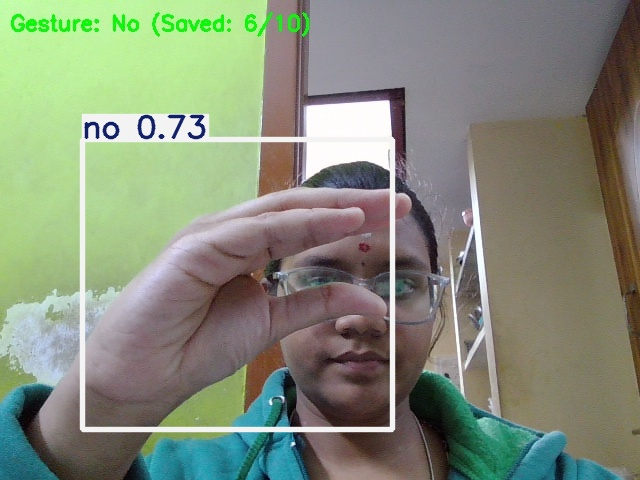

In [34]:
from IPython.display import Image, display

# Path to the resulting image
result_image_path = f'runs/detect/test_results/{uploaded_image}'

# Display the image
display(Image(filename=result_image_path))
